# Big Mart sales prediction using neural networks.

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

## Importing and eyeballing the data

In [2]:
train_data = pd.read_csv('train_set_big_mart.csv')
test_data = pd.read_csv('test_set_big_mart.csv')

In [3]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# There are null values in Item_Weight and Outlet_Size

In [6]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
# There are null values in Item_weight and Outlet_Size

In [10]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


## Imputing null values

In [11]:
train_data['Item_Weight'] = train_data['Item_Weight'].astype('float64')

test_data['Item_Weight'] = test_data['Item_Weight'].astype('float64')

In [12]:
train_data['Item_Weight'].fillna(train_data['Item_Weight'].median(),inplace=True)
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0],inplace=True)

test_data['Item_Weight'].fillna(test_data['Item_Weight'].median(),inplace=True)
test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0],inplace=True)

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


## Feature engineering

In [15]:
# dropping the Item_Identifier column since it won't be useful in making predictions

In [16]:
train_data.drop('Item_Identifier', axis=1, inplace=True)
test_data.drop('Item_Identifier', axis=1, inplace=True)

In [17]:
# Binning the Item_Visibility columns

In [18]:
# This function helps us to label encode any given column
def col_classifier(x,q1,median,q3):
    if x< q1:
        return 1
    elif x>q1 and x<= median:
        return 2
    elif x>median and x<=q3:
        return 3
    elif x>q3:
        return 4

In [19]:
q1 = train_data['Item_Visibility'].quantile(0.25)
median = train_data['Item_Visibility'].quantile(0.50)
q3 = train_data['Item_Visibility'].quantile(0.75)

train_data['Item_Visibility'] = train_data['Item_Visibility'].apply(lambda x: col_classifier(x,q1,median,q3))
test_data['Item_Visibility'] = test_data['Item_Visibility'].apply(lambda x: col_classifier(x,q1,median,q3))

In [20]:
# Since outlet_establishment_year will be more useful to us as a categorical column than as a numerical column, we will convert
# it to a pandas object

In [21]:
train_data['Outlet_Establishment_Year'] = train_data['Outlet_Establishment_Year'].astype('object')
test_data['Outlet_Establishment_Year'] = test_data['Outlet_Establishment_Year'].astype('object')

In [22]:
# Applying log to numerical columns

In [23]:
numerical_cols = ['Item_Weight', 'Item_MRP'] 
categorical_cols = list(test_data.columns.values[test_data.dtypes=='object'])

In [24]:
for col in numerical_cols:
    train_data[col] = np.log(1+train_data[col])
    test_data[col] = np.log(1+test_data[col])

In [25]:
# Modifying categorical columns. The data in Item_Fat_content is inconsistent, some of the values need to be changed from
# lf or low fat to 'Low Fat' and reg to 'Regular'

In [26]:
train_data['Item_Fat_Content'][train_data['Item_Fat_Content'] == 'reg'] = 'Regular'
train_data['Item_Fat_Content'][train_data['Item_Fat_Content'] == 'LF'] = 'Low Fat'
train_data['Item_Fat_Content'][train_data['Item_Fat_Content'] == 'low fat'] = 'Low Fat'

test_data['Item_Fat_Content'][test_data['Item_Fat_Content'] == 'reg'] = 'Regular'
test_data['Item_Fat_Content'][test_data['Item_Fat_Content'] == 'LF'] = 'Low Fat'
test_data['Item_Fat_Content'][test_data['Item_Fat_Content'] == 'low fat'] = 'Low Fat'

C:\Users\abhis\AppData\Local\Temp\ipykernel_14076\2390994751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Item_Fat_Content'][train_data['Item_Fat_Content'] == 'reg'] = 'Regular'
C:\Users\abhis\AppData\Local\Temp\ipykernel_14076\2390994751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Item_Fat_Content'][train_data['Item_Fat_Content'] == 'LF'] = 'Low Fat'
C:\Users\abhis\AppData\Local\Temp\ipykernel_14076\2390994751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [27]:
# Now let's one hot encode the categorical columns

In [28]:
train_data_onehot = pd.get_dummies(train_data, drop_first=True)
test_data_onehot = pd.get_dummies(test_data, drop_first=True)

In [29]:
# Since the one hot encoded values are in True or False form, we have to convert them to 1s and 0s.

In [30]:
for col in train_data_onehot.columns.values[train_data_onehot.dtypes == 'bool']:
    train_data_onehot[col] = train_data_onehot[col].map({True:1,False:0})
for col in test_data_onehot.columns.values[test_data_onehot.dtypes == 'bool']:
    test_data_onehot[col] = test_data_onehot[col].map({True:1,False:0})

Our Preprocessing is done here.

## Splitting the data into train and validation datasets.

In [31]:
train_inputs = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Fat_Content_Regular', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishment_Year_1998',
       'Outlet_Establishment_Year_1999', 'Outlet_Establishment_Year_2002',
       'Outlet_Establishment_Year_2004', 'Outlet_Establishment_Year_2007',
       'Outlet_Establishment_Year_2009', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']
train_targets = ['Item_Outlet_Sales']

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(train_data_onehot[train_inputs], train_data_onehot[train_targets], random_state=10, test_size=0.2)
# 80% will be train data and 20% will be validation data

In [33]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((6818, 43), (1705, 43), (6818, 1), (1705, 1))

## Now let's create a neural network using keras

Our Neural network will contain

1. Input layer of 43 neurons.
2. Two hidden layers of 20 and 10 neurons.
3. Output layer of one neuron.

In [34]:
input_shape = xtrain.shape[1]
output_shape = 1
hidden_layer_1 = 20
hidden_layer_2 = 10

Activation functions:

1. We will apply Relu activation function to the hidden layers.
2. We will apply linear activation function to the output layer.

In [35]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=(input_shape,)))
model.add(keras.layers.Dense(units=hidden_layer_1, activation='relu'))
model.add(keras.layers.Dense(units=hidden_layer_2, activation='relu'))
model.add(keras.layers.Dense(units=output_shape, activation='linear'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                880       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,101
Trainable params: 1,101
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Since rmse has to be defined in terms of keras.backend functions instead of numpy functions.
from keras import backend as k
def root_mean_squared_error(ytrue, ypred):
        return k.sqrt(k.mean(k.square(ypred - ytrue)))

In [38]:
# Defining the model with loss=rmse, optimizer=adam and metrics=R square
# run_eagerly has to be set true in order to avoid the NotImplemented error. Keras works in terms of tensorflow tensors 
# and sklearn works on numpy arrays.
model.compile(loss=root_mean_squared_error,optimizer='Adam',metrics=[r2_score], run_eagerly=True)

In [39]:
# Let's train the model for 100 epochs

In [40]:
model_history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=100)

Epoch 1/100
214/214 [==============================] - 30s 120ms/step - loss: 2718.9724 - r2_score: -1.8432 - val_loss: 2708.8406 - val_r2_score: -1.6557
Epoch 2/100
214/214 [==============================] - 23s 108ms/step - loss: 2453.2944 - r2_score: -1.3578 - val_loss: 2190.2605 - val_r2_score: -0.7139
Epoch 3/100
214/214 [==============================] - 24s 111ms/step - loss: 1829.2695 - r2_score: -0.2354 - val_loss: 1661.1343 - val_r2_score: 0.0278
Epoch 4/100
214/214 [==============================] - 23s 108ms/step - loss: 1604.7881 - r2_score: 0.0367 - val_loss: 1614.8945 - val_r2_score: 0.0784
Epoch 5/100
214/214 [==============================] - 24s 113ms/step - loss: 1577.6659 - r2_score: -0.0321 - val_loss: 1593.3771 - val_r2_score: 0.1027
Epoch 6/100
214/214 [==============================] - 23s 107ms/step - loss: 1557.6808 - r2_score: 0.1130 - val_loss: 1573.1494 - val_r2_score: 0.1262
Epoch 7/100
214/214 [==============================] - 23s 108ms/step - loss: 1537

In [41]:
# Let's make predictions on the test set provided.

In [42]:
predictions = model.predict(test_data_onehot)

178/178 [==============================] - 1s 5ms/step


In [43]:
predictions_list = []
for i in predictions:
    if i[0] < 0:
        i[0]=0
    predictions_list.append(i[0])

## Plot of loss vs epochs

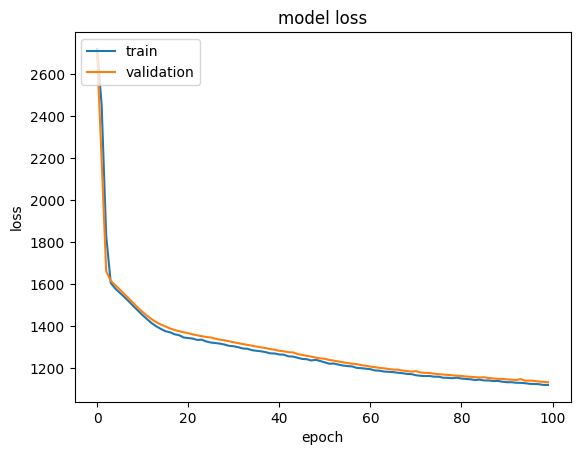

In [44]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Creating the final submission data frame and exporting it to a csv file.

In [45]:
test_data2 = pd.read_csv('test_set_big_mart.csv')

In [46]:
submission_file = pd.DataFrame({'Item_Identifier':list(test_data2['Item_Identifier']), 'Outlet_Identifier': list(test_data2['Outlet_Identifier']), 'Item_Outlet_Sales': predictions_list})

In [48]:
submission_file.to_csv(r'D:\Data science\Analytics Vidya\C5 Applied ML beginner to advanced\Assignments\Assignment 8\final_submission_file_Abhishek_A_B.csv',index=False)